В этом уроке мы разберём:
- Функции ошибки
- Градиентный спуск
- Backpropagation
- Autograd

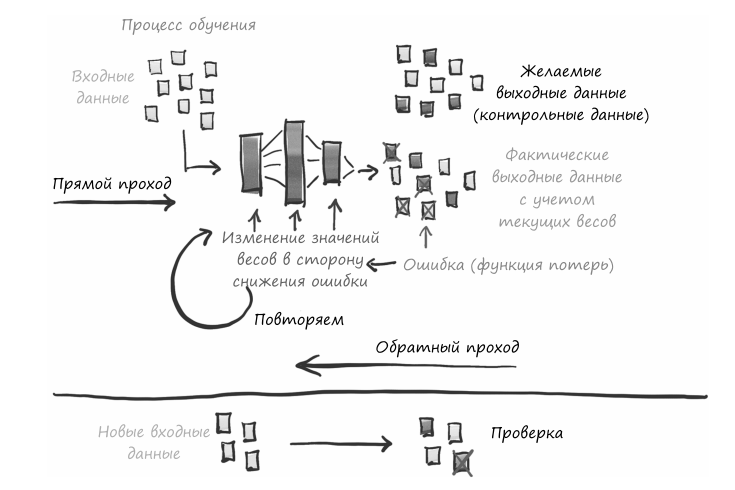

... a также попробуем построить простейший прецептрон на `PyTorch`


*В основном этот урок следует Главе 5 книги "PyTorch. Освещая глубокое обучение"*

In [151]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

## Задача о градуснике

Предположим, вы вернулись из Африки и привезли с собой в качестве сувенира термометр в виде страуса, прячущего голову в песок по мере повышения температуры. Связь угла наклона головы с температурой в цельсиях неизвестна.

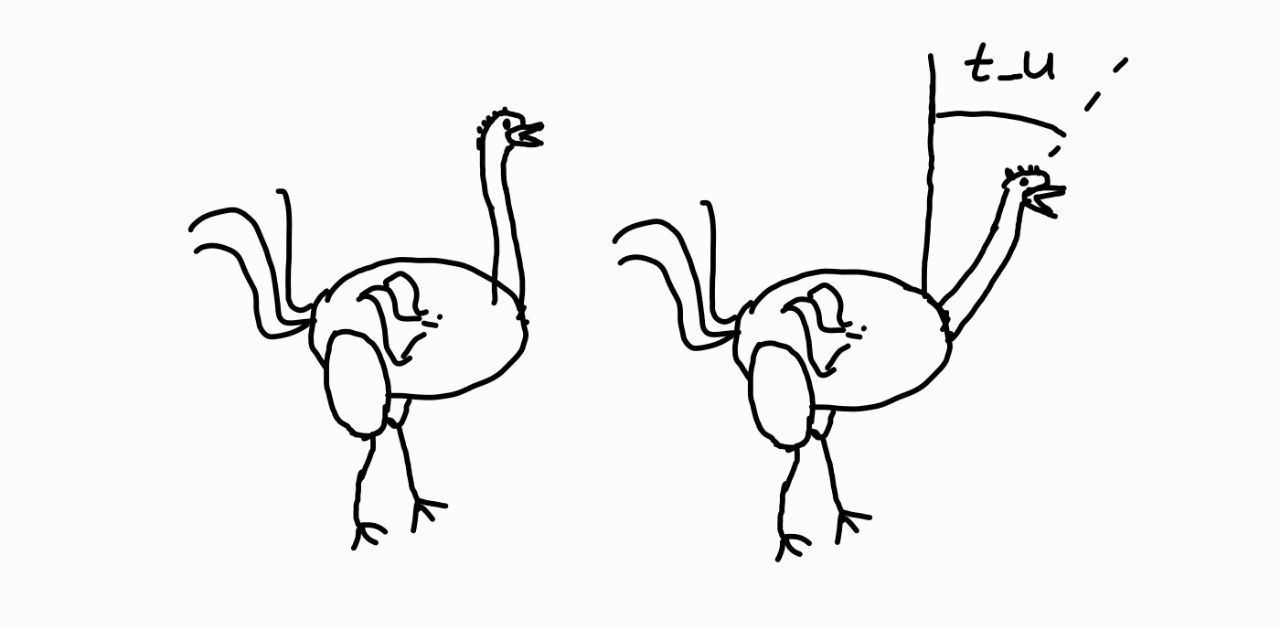

Попробуем найти эту связь с помощью машинного обучения!


### Этап 1: Сбор данных

Мы неделю записывали данные о реальной температуре `t_c` и показания страуса `t_u` и получили два следующих ряда:

In [152]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### Этап 2: Знакомство с данными

Визуализируем наши данные с помощью `matplotlib`.

*Обратим внимание, что благодаря грамотной реализации классов и методов в этих библиотеках, нам не нужно дополнительно выполнять какое-либо приведение типов.*

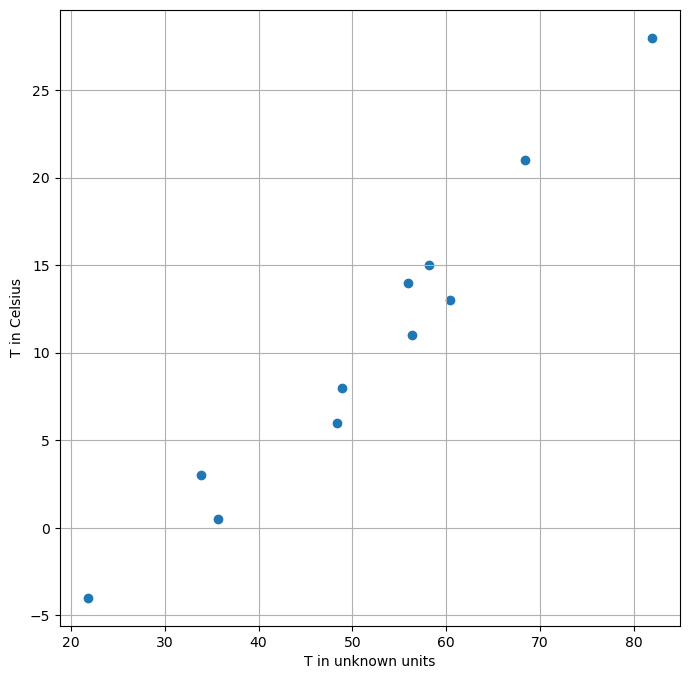

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(t_u, t_c)
ax.set_ylabel('T in Celsius')
ax.set_xlabel('T in unknown units')
ax.grid('on')

plt.show()

Видим, что данные очень простые и сразу подсказывают нам модель, которую следует выбрать для их предсказания. Какая-либо предобработка в данном случае не требуется.

### Этап 3: Строим модель

Очевидно, что в данных есть линейная зависимость и нам нужно найти функцию вида
$$\texttt{t\_c} = f(\texttt{t\_u}, w^k) = w_1\cdot\texttt{t\_u} + w_0$$
Для численных методов это была бы очень простая задача, однако мы будем её решать с помощью "прецептрона" (пусть и тривального).

В целом, мы могли бы просто определить функцию $f(x, w_1, w_0)$, но для понимания дальнейшего развития методики лучше соблюдать ООП-парадигму.

In [ ]:
# Реализуйте методы класса одномерного линейного слоя:

class linear:

    def __init__(self):

        # YOUR CODE

        pass


    def forward(self, x):

        # YOUR CODE

        return y_pred
    

In [ ]:
class linear_model:

    def __init__(self):

        self.w = torch.Tensor([0.0])
        self.b = torch.Tensor([0.0])


    def forward(self, x):

        y_pred = x*self.w + self.b

        return y_pred
    
    
    def __call__(self, x, w0, w1):

        y_pred = x*w1 + w0

        return y_pred



model = linear_model()


In [156]:
X_train = torch.linspace(-1, 1, 30)
model.forward(X_train)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])

### Этап 4: Выбираем функцию потерь

Функция потерь (loss fuction, cost function, чаще всего - просто loss)
$$\texttt{loss}: \texttt{y\_pred}\times\texttt{y\_true} \to \mathcal{R} $$
- Позволяет количественно сравнивать предсказанния модели с целевыми данными;
- Возвращает единственное число для каждой пары векторов `y_pred`, `y_true`;
- Должна быть [выпуклой](https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%BF%D1%83%D0%BA%D0%BB%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F);
- Обычно `loss`=0 при `y_pred`=`y_true`;
- Довольно часто функция потерь симметрична относительно перестановки аргументов (но не всегда! мы встретимся с такими функциями далее).

Пока обозначим 2 простейших способа измерить различие пары предсказаний:
- Квадрат разности (mean squared error, MSE) $(\texttt{y\_pred}-\texttt{y\_true})^2$
- Модуль разности () $\left| \texttt{y\_pred} - \texttt{y\_true} \right| $

Мы, в основном, пока будем использовать первую функцию, т.к. она ведёт себя очень просто и легко считается.
Кроме того, квадрат разности, в сравнении с модулем разности, больше "штрафует" редкие сильные выбросы. Обычно лучше иметь много небольших отклонений в предсказаниях, чем несколько сильных.

In [ ]:
# Реализуйте MSE-loss

# Поскольку здесь появляется усреднение, важно сразу договорится о размерностях
# Обычно размерность батча(выборки) идёт первой, поэтому усредняем именно по ней:
# y_pred.shape = y_true.shape = (batch, other_dims...)

class MSELoss:
    
    def __init__(self):

        pass


    def __call__(self, y_pred, y_true):

        # YOUR CODE
        
        return loss

loss = MSELoss()

### Этап 5: Строим алгоритм обучения

Каждому, кто изучал физику или численные методы, вид нашей функции потерь кое-что напомнинает:

torch.Size([61, 61])


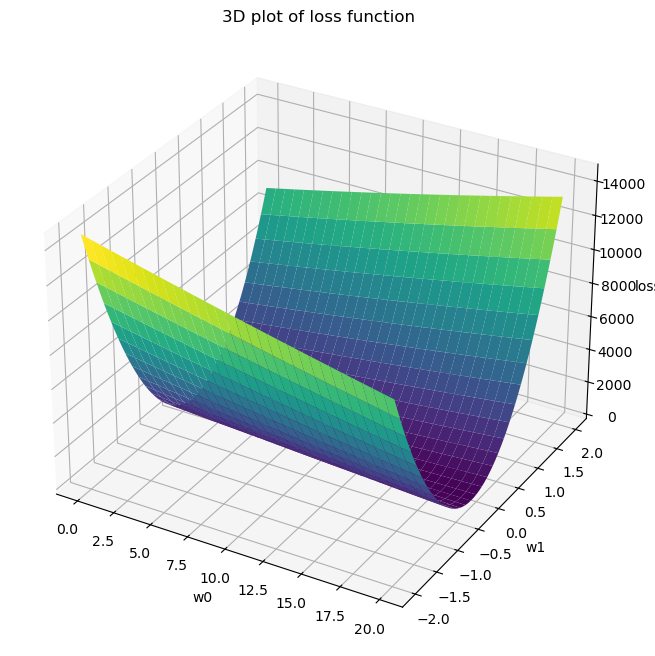

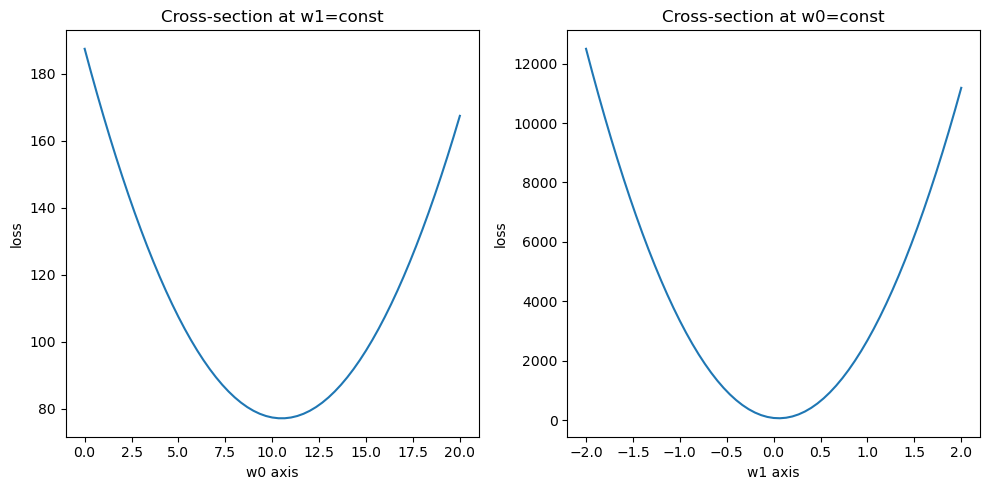

In [158]:
# 2d and 3d views of loss as loss(w)
n = 61
w0_space = torch.linspace(0, 20, n)
w1_space = torch.linspace(-2, 2, n)

w0_grid, w1_grid = torch.meshgrid(w0_space, w1_space)

y_p_grid = model(t_u.view(-1, 1, 1), w0_grid.view(1, n, n), w1_grid.view(1, n, n))
loss_val = loss(y_p_grid, t_c.view(-1, 1, 1))
print(loss_val.shape)

# Create a figure with a larger main axis and two smaller axes for cross-sections
fig1 = plt.figure(figsize=(10, 8))
ax = fig1.add_subplot(1, 1, 1, projection='3d')
# Main 3D surface plot
ax.plot_surface(w0_grid, w1_grid, loss_val, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
ax.set_title('3D plot of loss function')
plt.show()


fig2 = plt.figure(figsize=(10, 5))
# Cross-section at Y=0
cross_n1 = 30
ax_cross1 = fig2.add_subplot(121)
cross_section1 = loss_val[:, cross_n1]  # Cross-section along the Y-axis at Y=0
ax_cross1.plot(w0_grid[:, cross_n1], cross_section1)
ax_cross1.set_title('Cross-section at w1=const')
ax_cross1.set_xlabel('w0 axis')
ax_cross1.set_ylabel('loss')

# Cross-section at X=0
cross_n0 = 30
ax_cross0 = fig2.add_subplot(122)
cross_section0 = loss_val[cross_n0, :]  # Cross-section along the X-axis at X=0
ax_cross0.plot(w1_grid[cross_n0, :], cross_section0)
ax_cross0.set_title('Cross-section at w0=const')
ax_cross0.set_xlabel('w1 axis')
ax_cross0.set_ylabel('loss')

plt.tight_layout()
plt.show()


### Градиентный спуск

Физическая интуиция подсказывает, что на графике - обычная потенциальная яма. Если представить, что ошибка - это высота поверхности, алгоритм определения минимума функции построить очень просто - нужно просто дать силе тяжести сделать всё за вас и "покатиться" с горки вниз - в минимум функции ошибки. В этом и состоит идея **gradient descent**.

Сила тяжести, как известно, задаётся антиградиентом функции высоты и гравитационной постоянной g:
$$
F = - \nabla_x U, \quad U=g\cdot(h(x)) 
$$
В многомерном случае:
$$
F^k = - \partial_{x^k} U, \quad U=g\cdot(h({x^k})) 
$$
В нашем случае роль координат выполняют веса модели `w^k`, а роль гравитационной постоянной - параметр `learning rate` (`lr`), задающий темп сходимости модели:
$$
F^\texttt{w} = -\nabla_{\texttt{w}} U, \quad U = \texttt{lr} \cdot \texttt{loss}(\texttt{w}) 
$$
Мы сильно упрощаем уравнения движения и скорее пользуемся аристотелевой механикой, чем ньютоновской:
$$ \begin{align}
\partial_t\texttt{w} =& F^\texttt{w} \Rightarrow d\texttt{w} = F^\texttt{w}dt \\
\texttt{w}\, +\!\!=& -\texttt{lr}\cdot\partial_\texttt{w} \texttt{loss}(\texttt{w})
\end{align}$$
Таким образом, вычисляя градиент на каждой паре (`y_pred`,`y_true`) и обновляя веса по формуле (2), мы рано или поздно придём к минимуму функции ошибки, как гарантировано Универсальной Теоремой Аппроксимации, доказанной Розенблаттом.

### Backpropagation - это правило композиции

В приведённом выше рассуждении мы опустили важный вопрос - _а как считать градиент_? Для ответа разберём подробнее общее устройство нашей функции ошибки.

Когда мы считаем функцию ошибки для предсказанного `y_pred` и истинного `y_true` значений данных, мы не должны забывать, что для вычисления `y_pred` мы использовали нашу модель. Т.е.:
$$
\texttt{y\_pred}=\texttt{y\_pred(w, x)}=\texttt{model(w=w).forward(x)}
$$
и функцию ошибки тоже нужно рассматривать как композицию:
$$
\texttt{loss(w, x, y\_true)} = \texttt{loss(y\_pred(x, w), y\_true)}
$$
Как дифференцировать такую функцию?

Для этого вспомним производную композиции:
$$
\partial_w f(g(w)) = \partial_g f \cdot \partial_w g
$$
Тогда:
$$
\partial_w\texttt{loss(y\_pred(w, x), y\_true)} = \texttt{loss}'\texttt{(y\_pred(w, x), y\_true)} \cdot \partial_w\texttt{y\_pred(w, x)}
$$
Т.е. чтобы дифференцировать функцию ошибки _по весам_ модели, нужно уметь дифференцировать функцию ошибки по её аргументу (обычно легко), и уметь дифференцировать модель по её весам. 

Поскольку сама модель обычно тоже есть композиция разных функций, вычисление её производных по весам обычно не составляет труда: мы знаем, как дифференцируется каждый слой, а потом просто применяем правило композиции для нахождения общей производной!

В этом нехитром факте из математического анализа и кроется весь секрет _backpropagation_: чтобы получить градиенты на данном слое, нужно иметь процедуру дифференцирования слоя и знать производные на последующем слое.

Реализуем дифференцирование для всех наших модулей:

In [ ]:
class linear_model:

    def __init__(self):

        self.w = torch.tensor([0.0])
        self.b = torch.tensor([0.0])


    def forward(self, x):

        y_pred = x*self.w + self.b

        return y_pred
    

    def __call__(self, x, w0, w1):

        y_pred = x*w1 + w0

        return y_pred
    

    def grad_w(self, x, next_grad):

        # YOUR CODE

        
        return grad_
    

    def grad_b(self, x, next_grad):

        # YOUR CODE

        
        return grad_


class MSELoss:
    
    def __init__(self):
        pass


    def __call__(self, y_pred, y_true):

        # YOUR CODE

        return loss


    def grad(self, y_pred, y_true):

        # YOUR CODE

        return grad_
    
model = linear_model()
loss = MSELoss()

### Цикл обучения

Когда мы реализовали дифференцирование, дело осталось за малым - реализовать цикл обучения и обновление весов в нём.

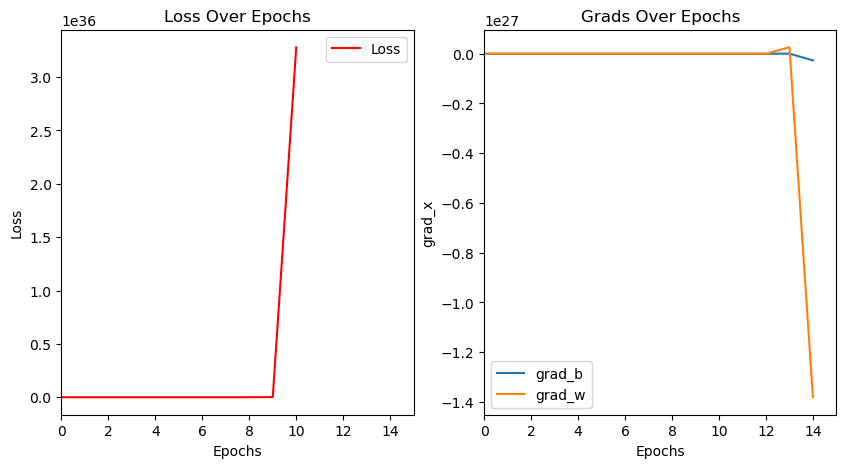

Weights b, w: tensor([2.6161e+23]) tensor([1.3551e+25])


In [ ]:
def train_loop(model, loss, X_train, y_train, lr=0.002, n_epochs=30):
    
    loss_history = []
    grad_b_history = []
    grad_w_history = [] 

    for epoch in range(n_epochs):

        # YOUR CODE
        

        # Сохраним данные для отрисовки
        loss_history.append(loss_val)
        grad_b_history.append(model_grad_b)
        grad_w_history.append(model_grad_w)

        pass

    # Визуализация
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10, 5))

    epoch_span = torch.arange(0, n_epochs, 1)

    ax0.plot(epoch_span, loss_history, 'r-', label='Loss')
    ax0.set_xlim(0, n_epochs)
    # ax0.set_ylim(0, 200) 
    ax0.set_xlabel('Epochs')
    ax0.set_ylabel('Loss')
    ax0.set_title('Loss Over Epochs')
    ax0.legend()

    ax1.plot(epoch_span, grad_b_history, '-', label='grad_b')
    ax1.plot(epoch_span, grad_w_history, '-', label='grad_w')
    ax1.set_xlim(0, n_epochs)
    # ax1.set_ylim(-20, 20)  
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('grad_x')
    ax1.set_title('Grads Over Epochs')
    ax1.legend()

    plt.show()

    pass

model = linear_model()
loss = MSELoss()
train_loop(model=model, loss=loss, X_train=t_u, y_train=t_c, lr=0.01, n_epochs=15)
print('Weights b, w:', model.b, model.w)

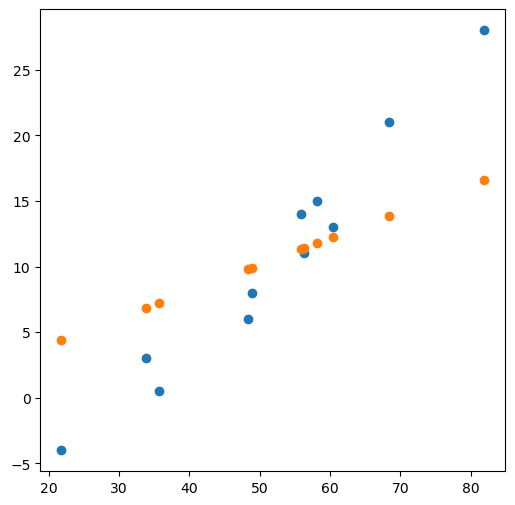

In [161]:
# Посмотрим, как соотносятся предсказания модели с реальными данными

t_c_pred = model.forward(t_u)

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(t_u, t_c)
ax.scatter(t_u, t_c_pred)
plt.show()

Модель явно недообучилась. Разберём 3 причины, почему так могло выйти:
- _Исходные данные не нормированы_. Кажется, в данном случае это мелочь, но обучение на ненормированных данных численно нестабильно.
- _Слишком большое усреднение градиентов_. Видим, что в конце обучения градиенты фактически равны нулю. 
- _Попали в локальный, а не глобальный минимум._ 



In [ ]:
class scaler:

    def __init__(self):
        pass


    def fit(self, x):

        # YOUR_CODE
        
        pass

    
    def transform(self, x):

        # YOUR_CODE

        return x_scaled
    
    
    def inverse(self, x):

        # YOUR_CODE
        

        return x_scaled

In [163]:
scaler = scaler()
scaler.fit(t_u)

print(scaler.transform(t_u))

tensor([-0.9565,  0.2436,  0.3802,  1.7883,  0.2673, -0.1723, -1.0635, -1.7823,
        -0.2020,  0.5109,  0.9862])


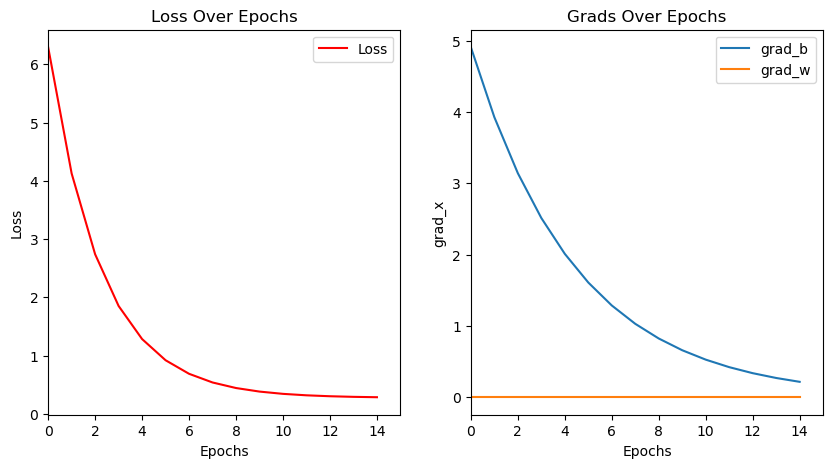

Weights b, w: tensor([-2.3673]) tensor([3.3352e-07])


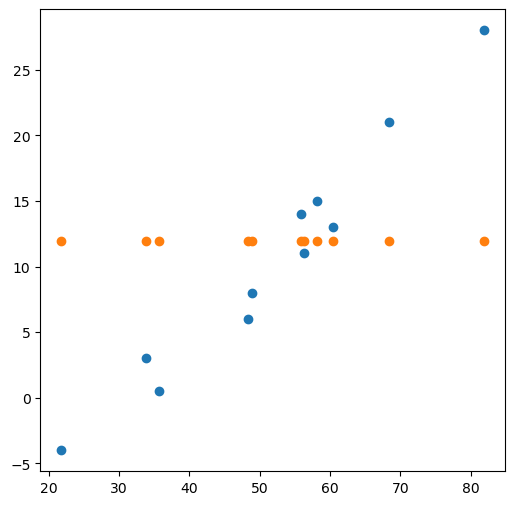

In [ ]:
x_scaler = scaler()
x_scaler.fit(t_u)
x_s = x_scaler.transform(t_u)

y_scaler = scaler()
y_scaler.fit(t_u)
y_s = x_scaler.transform(t_c)

model = linear_model()
loss = MSELoss()
train_loop(model=model, loss=loss, X_train=x_s, y_train=y_s, lr=1e-1, n_epochs=15)
print('Weights b, w:', model.b, model.w)


y_pred = model.forward(x_s)
t_c_pred = y_scaler.inverse(y_pred)

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(t_u, t_c)
ax.scatter(t_u, t_c_pred)
plt.show()

Нам удалось хорошо обучить только один параметр - смещение $b$: очевидно, двигая наше множество точек вниз или вверх, мы не сможем значительно уменьшить среднеквадратичное отклонение.

Параметр наклона прямой $w$ при этом вообще не обучался. Когда мы пробегаем выборку `x_train` размера `N` и обратно распространяем ошибку, на выходе получается `N` значений градиентов c размерностью тензора весов `w`. Чтобы их применить к весам, нужно как-то сократить размерность `N`. 

Мы использовали очевидный способ сократить эту размерность - полное усреднение/сумма по этой размерности. Но для весов линейного слоя градиент равен `x`, и, усредняя его, мы закономерно получаем 0 - ведь мы нормализовали данные ранее.

Можно попробовать другой очевидный способ: применить все эти градиенты последовательно, один за другим. Такой способ чреват быстрым скатыванием в локальный минимум и нестабильностью обучения (можете проверить сами).

Общепринятый подход - усреднять (или, что то же самое, накапливать) градиенты по некоторой небольшой выборке нашего тренировочного множества. Такой метод делает обучение довольно стабильным, а "накопленный" градиент чаще всего будет ненулевым.

Чтобы проверить этот подход, реализуйте класс `batch_sampler`, запоминающий тренировочные данные и выдающий набор батчей при каждом вызове метода `sample`:



In [ ]:
class batch_sampler:

    def __init__(self, X_train, y_train, batch_size, n_batches):
        
        # YOUR CODE
 

        pass


    def sample(self):

        # YOUR CODE
        batches = []
        

        return batches

In [170]:
### Проверим:

sampler = batch_sampler(t_u, t_c, 2, 2)
print(sampler.sample())
print(sampler.sample())

[(tensor([56.3000, 68.4000]), tensor([11., 21.])), (tensor([35.7000, 58.2000]), tensor([ 0.5000, 15.0000]))]
[(tensor([21.8000, 35.7000]), tensor([-4.0000,  0.5000])), (tensor([60.4000, 33.9000]), tensor([13.,  3.]))]


In [ ]:
# Переопределим train loop:

def train_loop(model, loss, sampler, lr=0.002, n_epochs=30):
    
    loss_history = []
    
    y_eval = model.forward(sampler.X_train)
    loss_history.append(loss(y_eval, sampler.y_train))

    for epoch in range(n_epochs):

        batches = sampler.sample()

        for (x_b, y_b) in batches:

            y_pred = model.forward(x_b)
            # loss_val = loss(y_pred, y_b) - уже не нужно вызывать
            loss_grad = loss.grad(y_pred, y_b)

            model_grad_w = model.grad_w(x_b, loss_grad)
            model_grad_b = model.grad_b(x_b, loss_grad)

            model.w -= lr*model_grad_w
            model.b -= lr*model_grad_b

        
        y_eval = model.forward(sampler.X_train)
        loss_history.append(loss(y_eval, sampler.y_train))


    # Визуализация
    fig, ax0 = plt.subplots(1,1, figsize=(5, 5))

    epoch_span = torch.arange(0, n_epochs+1, 1)

    ax0.plot(epoch_span, loss_history, 'r-', label='Loss')
    ax0.set_xlim(0, n_epochs)
    ax0.set_xlabel('Epochs')
    ax0.set_ylabel('Loss')
    ax0.set_title('Loss Over Epochs')
    ax0.legend()

    plt.show()

    pass

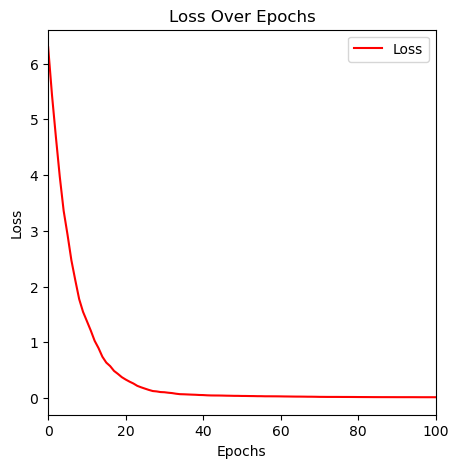

Weights b, w: tensor([-2.4562]) tensor([0.4741])


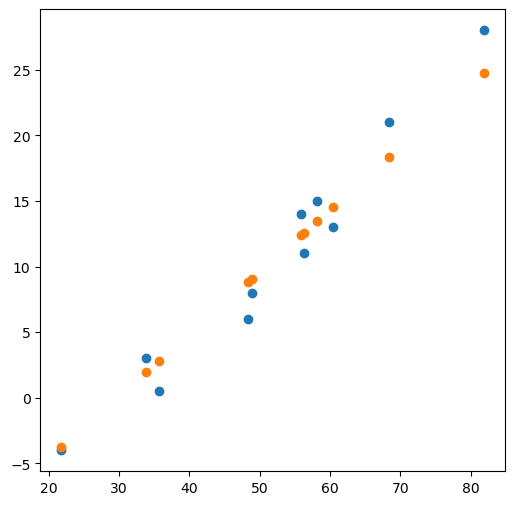

In [ ]:
x_scaler = scaler()
x_scaler.fit(t_u)
x_s = x_scaler.transform(t_u)

y_scaler = scaler()
y_scaler.fit(t_u)
y_s = x_scaler.transform(t_c)

sampler=batch_sampler(x_s, y_s, 3, 4)

model = linear_model()
loss = MSELoss()

train_loop(model=model, loss=loss, sampler=sampler, lr=1e-2, n_epochs=100)
print('Weights b, w:', model.b, model.w)


y_pred = model.forward(x_s)
t_c_pred = y_scaler.inverse(y_pred)

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(t_u, t_c)
ax.scatter(t_u, t_c_pred)
plt.show()

Поздравляю, мы обучили первую модель!)